### Student Information
Name: 張慧榮

Student ID: 411856114

GitHub ID: Timss22

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here

### import all the necessary dependencies

To make it easier, I just copy the previous import code from the master.ipynb, and later see if I will use it or not.

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Create dataframe and check the info of the data

In [ ]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print(df.head())
print(df.info())

### Do a small cleansing to remove uneccessary data

In [31]:
#selected_columns = ['type', 'datetime','subreddit', 'title', 'author', 'upvotes','text','sentiment','entities']
critical_columns = ['title', 'datetime', 'subreddit', 'text','sentiment']
print(f"Initial dataframe shape: {df.shape}")
df = df.dropna(subset=critical_columns)
print(f"Dataframe shape after dropping rows with missing critical values: {df.shape}")

Initial dataframe shape: (847, 18)
Dataframe shape after dropping rows with missing critical values: (847, 18)


### Adding Columns to enrich data

To enrich data, we can simplyfy sentiment to a more readable data

In [25]:
df['sentiment_label'] = df['sentiment'].map({-1.0: 'Bearish', 0.0: 'Neutral', 1.0: 'Bullish'})
print(df['sentiment_label'].head())

0    Bearish
1    Bullish
2    Neutral
3    Bullish
4    Neutral
Name: sentiment_label, dtype: object


## Try out features for Fun Learning
I think best approach to learning more is to try out the features by ourselves and learn the syntaxes and how it works.

### accessing certain data category columns

In [29]:
df[df['sentiment_label'] == 'Bullish'][::80][:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_label,msg_length
1,comment,2025-04-12 01:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Bullish,137
196,comment,2025-04-11 14:45:30,mmkkne3,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,BlackAdder7,https://i.redd.it/b51iqmecn7ue1.jpeg,20,NaN,NaN,Just waiting for a bank to announce they are d...,0.525000,0.100000,1.0,"['bank', 'International', 'Harmonized', 'Tarif...",-1.0,Bullish,153
386,post,2025-03-21 13:01:24,1jgg9ov,stockstobuytoday,Social Media Top Trending Stocks,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,2,0.0,1.0,Top trending stock tickers on social media\n\n...,0.211111,0.188889,1.0,"['Social', 'stock', 'stockbuyvest.com', ']']",0.0,Bullish,74


### Checking Duplicates

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Finding the most used term in stocks reddit

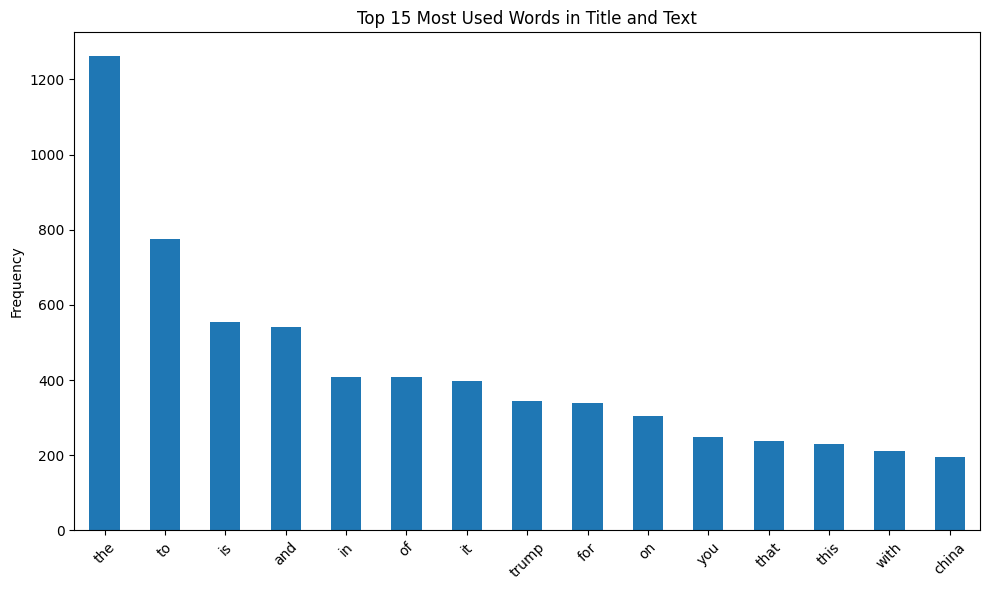

In [48]:
from collections import Counter
import re

import matplotlib.pyplot as plt

# Combine all text and title into a single list of words
all_text = ' '.join(df['text'].astype(str)) + ' ' + ' '.join(df['title'].astype(str))
# Remove non-alphabetic characters and lowercase
words = re.findall(r'\b[a-zA-Z]{2,}\b', all_text.lower())

# Count word frequencies
word_counts = Counter(words)
top_words = word_counts.most_common(15)

# 1. Convert the list of (word, count) tuples into a pandas Series.
#    The word becomes the index, and the count becomes the value.
words_series = pd.Series(dict(top_words))
# Plot
words_series.plot(
    kind='bar',
    title='Top 15 Most Used Words in Title and Text',
    ylabel='Frequency',
    rot=45, # Rotate x-axis labels
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()

*Since the results end up in a lot of stop words like preposition, articles, auxiliary, etc. and not the vocabularies we want. we will attempt on filtering out those words to show the vocabularies*

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


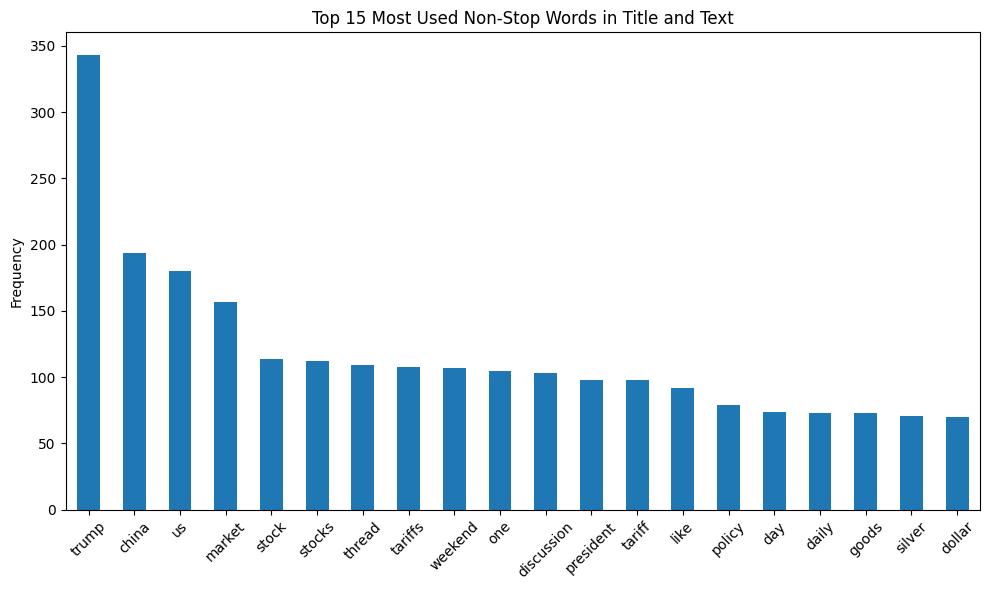

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

words_series = pd.Series(dict(top_words))

words_series.plot(
    kind='bar',
    title='Top 15 Most Used Non-Stop Words in Title and Text',
    ylabel='Frequency',
    rot=45,
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()

# Detect bots / spam
In most cases, bots are instructed to promote some illegal website like online gambling, or promote unreliable stocks that are easily be a pump and dump stock. we will need to filter out the common phrases from those bots/spammers

0


<Axes: >

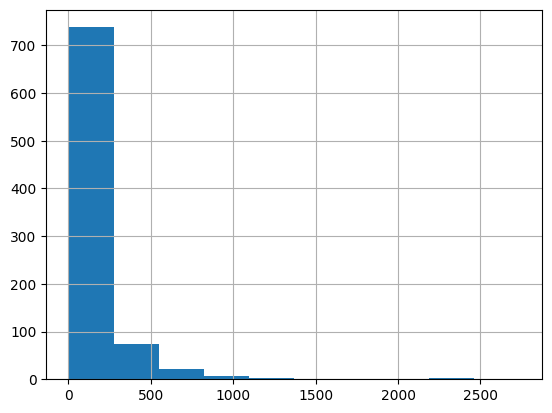

In [ ]:
import helpers.data_mining_helpers as dmh



# Phase 2

In [ ]:
### Begin Assignment Here